In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
lung_cancer = pd.read_csv("survey lung cancer.csv")
lung_cancer

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [64]:
lung_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [65]:
lung_cancer.isna().sum().to_frame().rename(columns={0:"Missing Values"})

,Missing Values
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [66]:
lung_cancer.duplicated().sum()

33

In [67]:
lung_cancer.drop_duplicates(inplace=True)

In [68]:
lung_cancer

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,F,59,1,2,2,2,1,1,2,2,1,2,1,2,1,YES
280,F,59,2,1,1,1,2,2,2,1,1,1,2,1,1,NO
281,M,55,2,1,1,1,1,2,2,1,1,1,2,1,2,NO
282,M,46,1,2,2,1,1,1,1,1,1,1,1,2,2,NO


In [69]:
lung_cancer.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971
std,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


C:\Users\anwes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


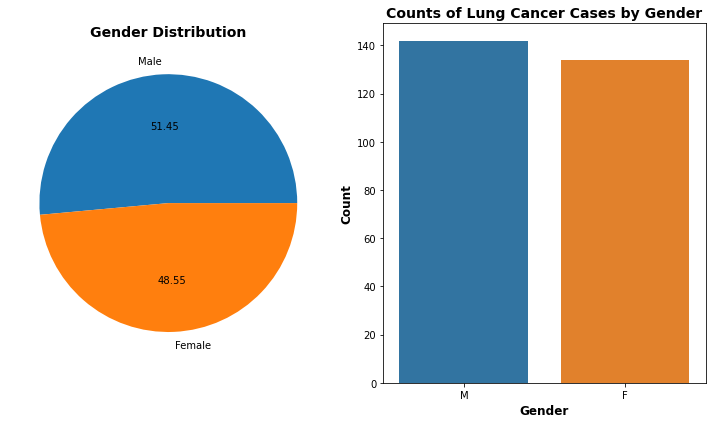

In [70]:
plt.figure(figsize=(10, 6))

plt.subplot(121)
plt.pie(lung_cancer['GENDER'].value_counts(), labels=['Male', 'Female'], autopct="%0.2f")
plt.title('Gender Distribution', fontsize=14, fontweight='bold')

plt.subplot(122)
sns.countplot('GENDER', data=lung_cancer)
plt.title('Counts of Lung Cancer Cases by Gender', fontsize=14, fontweight='bold')
plt.xlabel("Gender", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

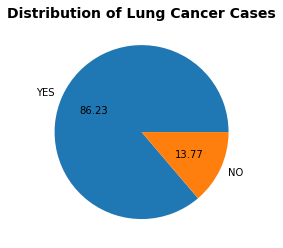

In [71]:
plt.pie(lung_cancer['LUNG_CANCER'].value_counts(), labels=['YES', 'NO'], autopct="%0.2f")
plt.title('Distribution of Lung Cancer Cases', fontsize=14, fontweight='bold')

plt.show()

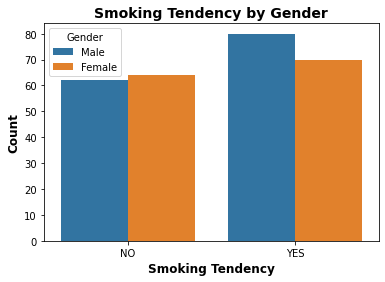

In [72]:
lung_cancer['SMOKING'] = lung_cancer['SMOKING'].map({1: 'NO', 2: 'YES'})
sns.countplot(data=lung_cancer, x="SMOKING", hue="GENDER")
plt.xlabel("Smoking Tendency", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')
plt.title("Smoking Tendency by Gender", fontsize=14, fontweight='bold')
plt.legend(title="Gender", labels=["Male", "Female"])

plt.show()

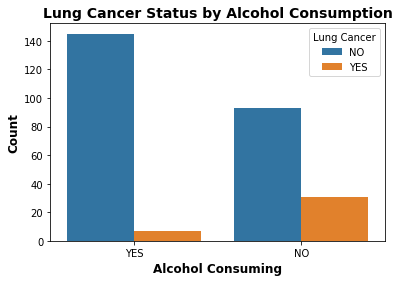

In [73]:
lung_cancer['ALCOHOL CONSUMING'] = lung_cancer['ALCOHOL CONSUMING'].replace({1: 'NO', 2: 'YES'})
sns.countplot(data=lung_cancer, x="ALCOHOL CONSUMING", hue="LUNG_CANCER")
plt.xlabel("Alcohol Consuming", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')
plt.title("Lung Cancer Status by Alcohol Consumption", fontsize=14, fontweight='bold')
plt.legend(title="Lung Cancer", labels=["NO", "YES"])

plt.show()

<AxesSubplot:xlabel='ANXIETY', ylabel='PEER_PRESSURE'>

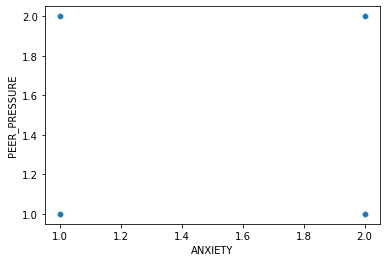

In [74]:
sns.scatterplot(data=lung_cancer, x="ANXIETY", y="PEER_PRESSURE")

In [75]:
category_cols =lung_cancer.select_dtypes(["object"]).head()
category_cols

,GENDER,SMOKING,ALCOHOL CONSUMING,LUNG_CANCER
0,M,NO,YES,YES
1,M,YES,NO,YES
2,F,NO,NO,NO
3,M,YES,YES,NO
4,F,NO,NO,NO


In [76]:
from sklearn.preprocessing import LabelEncoder

In [77]:
lbl_encoder = LabelEncoder()

In [78]:
lung_cancer['GENDER'] = lbl_encoder.fit_transform(lung_cancer['GENDER'])
lung_cancer['SMOKING'] = lbl_encoder.fit_transform(lung_cancer['SMOKING'])
lung_cancer['ALCOHOL CONSUMING'] = lbl_encoder.fit_transform(lung_cancer['ALCOHOL CONSUMING'])
lung_cancer['LUNG_CANCER'] = lbl_encoder.fit_transform(lung_cancer['LUNG_CANCER'])

lung_cancer.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,2,2,1,1,2,1,2,1,2,2,2,2,1
1,1,74,1,1,1,1,2,2,2,1,0,1,2,2,2,1
2,0,59,0,1,1,2,1,2,1,2,0,2,2,1,2,0
3,1,63,1,2,2,1,1,1,1,1,1,1,1,2,2,0
4,0,63,0,2,1,1,1,1,1,2,0,2,2,1,1,0


In [79]:
X = lung_cancer.drop(['LUNG_CANCER'], axis=1)
y = lung_cancer.LUNG_CANCER

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
from sklearn.metrics import classification_report

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
logreg = LogisticRegression()

# Train the model on the training data
logreg.fit(X_train, y_train)

C:\Users\anwes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [85]:
y_pred = logreg.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1])

In [86]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(y_test, y_pred)

0.08928571428571429

In [87]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("the model has an accuracy of", accuracy*100)

the model has an accuracy of 91.07142857142857


In [88]:
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.58      0.74        12
           1       0.90      1.00      0.95        44

    accuracy                           0.91        56
   macro avg       0.95      0.79      0.84        56
weighted avg       0.92      0.91      0.90        56



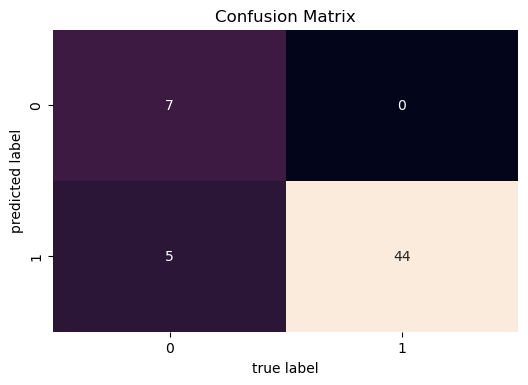

In [89]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=100)
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

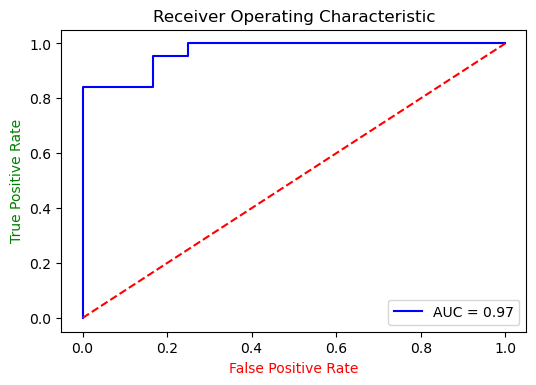

In [90]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# calculate the fpr and tpr for all thresholds of the classification
probs =logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
plt.figure(dpi=100)                       # to plot high quality graph
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate', color='g')
plt.xlabel('False Positive Rate', color='r')
plt.show()